In [151]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import sklearn as sk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
import pickle
import sys
from sys import exc_info
import ast
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import mean_absolute_error

In [152]:
#Importing both the file using pandas 
data1 = pd.read_csv('C:/Users/Lenovo/OneDrive/Desktop/KELAS/swarm intelegence/tugas besar/last day/movies data.csv')
data2 = pd.read_csv('C:/Users/Lenovo/OneDrive/Desktop/KELAS/swarm intelegence/tugas besar/last day/ratings data.csv')

In [153]:
#Deleting unnecessary columns
data1 = data1.drop('Unnamed: 0',axis = 1)
data2 = data2.drop(['Unnamed: 0','Timestamp'],axis = 1)

In [154]:
data = pd.merge(data2 , data1 , how='outer', on='MovieID')
data

,UserID,MovieID,Rating,Title,Genres
0,1.0,1193,5.0,One Flew Over the Cuckoo's Nest (1975),Drama
1,2.0,1193,5.0,One Flew Over the Cuckoo's Nest (1975),Drama
2,12.0,1193,4.0,One Flew Over the Cuckoo's Nest (1975),Drama
3,15.0,1193,4.0,One Flew Over the Cuckoo's Nest (1975),Drama
4,17.0,1193,5.0,One Flew Over the Cuckoo's Nest (1975),Drama
...,...,...,...,...,...
1000381,NaN,3650,NaN,Anguish (Angustia) (1986),Horror
1000382,NaN,3750,NaN,Boricua's Bond (2000),Drama
1000383,NaN,3829,NaN,Mad About Mambo (2000),Comedy|Romance
1000384,NaN,3856,NaN,Autumn Heart (1999),Drama


In [155]:
data.isnull().sum()

UserID     177
MovieID      0
Rating     177
Title        0
Genres       0
dtype: int64

In [156]:
#WE simply drop the null values coz the are not treatable
data.dropna(inplace= True )

In [157]:
ratings=data[['UserID','MovieID','Rating', 'Title']]
ratings

,UserID,MovieID,Rating,Title
0,1.0,1193,5.0,One Flew Over the Cuckoo's Nest (1975)
1,2.0,1193,5.0,One Flew Over the Cuckoo's Nest (1975)
2,12.0,1193,4.0,One Flew Over the Cuckoo's Nest (1975)
3,15.0,1193,4.0,One Flew Over the Cuckoo's Nest (1975)
4,17.0,1193,5.0,One Flew Over the Cuckoo's Nest (1975)
...,...,...,...,...
1000204,5949.0,2198,5.0,Modulations (1998)
1000205,5675.0,2703,3.0,Broken Vessels (1998)
1000206,5780.0,2845,1.0,White Boys (1999)
1000207,5851.0,3607,5.0,One Little Indian (1973)


In [158]:
# dikarekanakan data masi sangat besar kita perkecil dengan hanya mengolah data berdasarkan 100 pengguna yang memberikan rating
users_list = np.unique(ratings['UserID'])[:11]
ratings = ratings.loc[ratings['UserID'].isin(users_list)]
print('Shape of ratings dataset is: ',ratings.shape, '\n')
print('Max values in dataset are \n',ratings.max(), '\n')
print('Min values in dataset are \n',ratings.min(), '\n')
print('Total Users: ', np.unique(ratings['UserID']).shape[0])
print('Total Movies which are rated by 100 users: ', np.unique(ratings['MovieID']).shape[0])

Shape of ratings dataset is:  (1337, 4) 

Max values in dataset are 
 UserID                11.0
MovieID               3948
Rating                 5.0
Title      eXistenZ (1999)
dtype: object 

Min values in dataset are 
 UserID                    1.0
MovieID                     1
Rating                    1.0
Title      'burbs, The (1989)
dtype: object 

Total Users:  11
Total Movies which are rated by 100 users:  829


In [159]:
#kita perkecil lagi data dengan memilih 200 data film pertama
movies_list = np.unique(ratings['MovieID'])[:50]
ratings = ratings.loc[ratings['MovieID'].isin(movies_list)]
print('Shape of ratings dataset is: ',ratings.shape, '\n')
print('Max values in dataset are \n',ratings.max(), '\n')
print('Min values in dataset are \n',ratings.min(), '\n')
print('Total Users: ', np.unique(ratings['UserID']).shape[0])
print('Total Movies which are rated by 100 users: ', np.unique(ratings['MovieID']).shape[0])

Shape of ratings dataset is:  (84, 4) 

Max values in dataset are 
 UserID                  11.0
MovieID                  216
Rating                   5.0
Title      Waterworld (1995)
dtype: object 

Min values in dataset are 
 UserID                           1.0
MovieID                            1
Rating                           1.0
Title      Angels and Insects (1995)
dtype: object 

Total Users:  10
Total Movies which are rated by 100 users:  50


In [160]:
users_fav_movies = ratings.loc[:, ['UserID', 'MovieID']]
users_fav_movies = ratings.reset_index(drop = True)
users_fav_movies

,UserID,MovieID,Rating,Title
0,1.0,48,5.0,Pocahontas (1995)
1,6.0,48,5.0,Pocahontas (1995)
2,10.0,48,4.0,Pocahontas (1995)
3,1.0,150,5.0,Apollo 13 (1995)
4,5.0,150,2.0,Apollo 13 (1995)
...,...,...,...,...
79,10.0,203,4.0,"To Wong Foo, Thanks for Everything! Julie Newm..."
80,10.0,208,4.0,Waterworld (1995)
81,11.0,216,4.0,Billy Madison (1995)
82,11.0,85,1.0,Angels and Insects (1995)


In [161]:
users_fav_movies.T

,0,1,2,3,4,5,6,7,8,9,...,74,75,76,77,78,79,80,81,82,83
UserID,1.0,6.0,10.0,1.0,5.0,8.0,9.0,10.0,1.0,6.0,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,11.0,11.0,11.0
MovieID,48,48,48,150,150,150,150,150,1,1,...,7,180,186,62,116,203,208,216,85,88
Rating,5.0,5.0,4.0,5.0,2.0,4.0,3.0,5.0,5.0,4.0,...,4.0,2.0,3.0,5.0,3.0,4.0,4.0,4.0,1.0,4.0
Title,Pocahontas (1995),Pocahontas (1995),Pocahontas (1995),Apollo 13 (1995),Apollo 13 (1995),Apollo 13 (1995),Apollo 13 (1995),Apollo 13 (1995),Toy Story (1995),Toy Story (1995),...,Sabrina (1995),Mallrats (1995),Nine Months (1995),Mr. Holland's Opus (1995),Anne Frank Remembered (1995),"To Wong Foo, Thanks for Everything! Julie Newm...",Waterworld (1995),Billy Madison (1995),Angels and Insects (1995),Black Sheep (1996)


In [162]:
users_fav_movies.to_csv('C:/Users/Lenovo/OneDrive/Desktop/KELAS/swarm intelegence/tugas besar/bahan/filtered_ratingsdata2.csv')

KMEANS

In [163]:
data_x = users_fav_movies[[  'Rating','UserID']]
data_x

,Rating,UserID
0,5.0,1.0
1,5.0,6.0
2,4.0,10.0
3,5.0,1.0
4,2.0,5.0
...,...,...
79,4.0,10.0
80,4.0,10.0
81,4.0,11.0
82,1.0,11.0


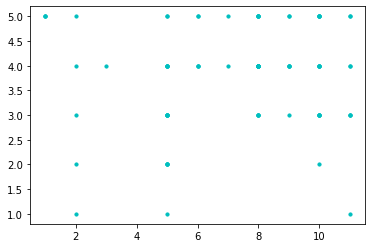

In [164]:
plt.scatter(users_fav_movies.UserID, users_fav_movies.Rating, s =10, c = "c", marker = "o", alpha = 1)
plt.show()

In [165]:
x_array =  np.array(data_x)
print(x_array)


[[ 5.  1.]
 [ 5.  6.]
 [ 4. 10.]
 [ 5.  1.]
 [ 2.  5.]
 [ 4.  8.]
 [ 3.  9.]
 [ 5. 10.]
 [ 5.  1.]
 [ 4.  6.]
 [ 4.  8.]
 [ 5.  9.]
 [ 5. 10.]
 [ 5.  2.]
 [ 5.  7.]
 [ 5.  8.]
 [ 4. 10.]
 [ 3. 11.]
 [ 2.  2.]
 [ 4.  2.]
 [ 5.  8.]
 [ 1.  2.]
 [ 3.  2.]
 [ 4.  3.]
 [ 3. 10.]
 [ 5. 11.]
 [ 3.  5.]
 [ 3.  8.]
 [ 3.  5.]
 [ 4.  5.]
 [ 3.  5.]
 [ 5.  9.]
 [ 3. 11.]
 [ 2.  5.]
 [ 4.  7.]
 [ 5.  5.]
 [ 4.  9.]
 [ 5. 11.]
 [ 2.  5.]
 [ 4.  5.]
 [ 4.  9.]
 [ 4.  5.]
 [ 3.  5.]
 [ 4.  8.]
 [ 4.  9.]
 [ 3.  5.]
 [ 1.  5.]
 [ 4.  8.]
 [ 3. 10.]
 [ 5.  5.]
 [ 2.  5.]
 [ 4.  5.]
 [ 5. 10.]
 [ 4.  5.]
 [ 4.  6.]
 [ 3.  5.]
 [ 4.  8.]
 [ 3. 11.]
 [ 4.  6.]
 [ 4.  8.]
 [ 5.  6.]
 [ 3.  8.]
 [ 4.  8.]
 [ 3.  8.]
 [ 5.  8.]
 [ 3.  8.]
 [ 4.  8.]
 [ 4.  8.]
 [ 5.  8.]
 [ 4.  8.]
 [ 5.  8.]
 [ 4.  9.]
 [ 5. 10.]
 [ 3. 10.]
 [ 4. 10.]
 [ 2. 10.]
 [ 3. 10.]
 [ 5. 10.]
 [ 3. 10.]
 [ 4. 10.]
 [ 4. 10.]
 [ 4. 11.]
 [ 1. 11.]
 [ 4. 11.]]


In [166]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x_array)
x_scaled

array([[1.  , 0.  ],
       [1.  , 0.5 ],
       [0.75, 0.9 ],
       [1.  , 0.  ],
       [0.25, 0.4 ],
       [0.75, 0.7 ],
       [0.5 , 0.8 ],
       [1.  , 0.9 ],
       [1.  , 0.  ],
       [0.75, 0.5 ],
       [0.75, 0.7 ],
       [1.  , 0.8 ],
       [1.  , 0.9 ],
       [1.  , 0.1 ],
       [1.  , 0.6 ],
       [1.  , 0.7 ],
       [0.75, 0.9 ],
       [0.5 , 1.  ],
       [0.25, 0.1 ],
       [0.75, 0.1 ],
       [1.  , 0.7 ],
       [0.  , 0.1 ],
       [0.5 , 0.1 ],
       [0.75, 0.2 ],
       [0.5 , 0.9 ],
       [1.  , 1.  ],
       [0.5 , 0.4 ],
       [0.5 , 0.7 ],
       [0.5 , 0.4 ],
       [0.75, 0.4 ],
       [0.5 , 0.4 ],
       [1.  , 0.8 ],
       [0.5 , 1.  ],
       [0.25, 0.4 ],
       [0.75, 0.6 ],
       [1.  , 0.4 ],
       [0.75, 0.8 ],
       [1.  , 1.  ],
       [0.25, 0.4 ],
       [0.75, 0.4 ],
       [0.75, 0.8 ],
       [0.75, 0.4 ],
       [0.5 , 0.4 ],
       [0.75, 0.7 ],
       [0.75, 0.8 ],
       [0.5 , 0.4 ],
       [0.  , 0.4 ],
       [0.75,

In [167]:
kmeans = KMeans(n_clusters=6, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
kmeans.fit(x_scaled)

print(kmeans.labels_)
users_fav_movies["Cluster"] = kmeans.labels_

[3 4 0 3 1 0 2 5 3 4 0 5 5 3 4 5 0 2 1 3 5 1 1 3 2 5 1 2 1 4 1 5 2 1 4 4 0
 5 1 4 0 4 1 0 0 1 1 0 2 4 1 4 5 4 4 1 0 2 4 0 4 2 0 2 5 2 0 0 5 0 5 0 5 2
 0 2 2 5 2 0 0 0 2 0]


In [168]:
centers=kmeans.cluster_centers_
print(centers)


[[0.75       0.7952381 ]
 [0.33928571 0.33571429]
 [0.45       0.86666667]
 [0.91666667 0.06666667]
 [0.83928571 0.46428571]
 [1.         0.82857143]]


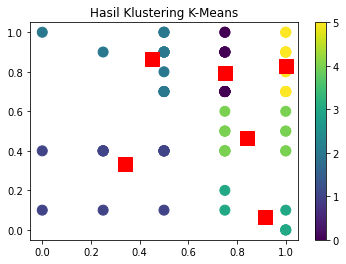

In [169]:
output = plt.scatter(x_scaled[:,0], x_scaled[:,1], s = 100, c = users_fav_movies.Cluster, marker = "o", alpha = 1, )
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='red', s=200, alpha=1 , marker="s");
plt.title("Hasil Klustering K-Means")
plt.colorbar (output)
plt.show()

In [170]:
users_fav_movies.sort_values(by=['Rating'], ascending=False)

,UserID,MovieID,Rating,Title,Cluster
0,1.0,48,5.0,Pocahontas (1995),3
14,7.0,110,5.0,Braveheart (1995),4
37,11.0,50,5.0,"Usual Suspects, The (1995)",5
49,5.0,29,5.0,"City of Lost Children, The (1995)",4
35,5.0,50,5.0,"Usual Suspects, The (1995)",4
...,...,...,...,...,...
38,5.0,52,2.0,Mighty Aphrodite (1995),1
4,5.0,150,2.0,Apollo 13 (1995),1
21,2.0,21,1.0,Get Shorty (1995),1
46,5.0,24,1.0,Powder (1995),1


In [171]:
cluster_matrix = users_fav_movies.pivot_table(index=['Cluster'], columns=['MovieID'], values='Rating')
cluster_matrix.fillna(0, inplace=True)
cluster_matrix

MovieID,1,2,4,6,7,14,16,17,21,24,...,176,180,186,194,199,202,203,208,215,216
Cluster,,,,,,,,,,,,,,,,,,,,,
0,4.0,0.0,0.0,0.0,4.0,4.0,4.0,4.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,4.0
1,0.0,0.0,0.0,2.0,0.0,0.0,3.0,0.0,1.0,1.0,...,0.0,0.0,0.0,3.0,0.0,2.0,0.0,0.0,3.0,0.0
2,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,0.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.0,0.0,0.0,4.0,0.0,0.0,0.0,4.0,0.0,0.0,...,4.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0
5,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [172]:
from sklearn.metrics import pairwise_distances
movie_similarity = 1 - pairwise_distances(cluster_matrix.values, metric='cosine')
np.fill_diagonal(movie_similarity, 0)
cluster_matrix = pd.DataFrame(movie_similarity)
cluster_matrix

,0,1,2,3,4,5
0,0.000000,0.218282,0.242933,0.389249,0.379567,0.310087
1,0.218282,0.000000,0.353519,0.094407,0.054553,0.150414
2,0.242933,0.353519,0.000000,0.330965,0.085379,0.301321
3,0.389249,0.094407,0.330965,0.000000,0.383046,0.555225
4,0.379567,0.054553,0.085379,0.383046,0.000000,0.313863
5,0.310087,0.150414,0.301321,0.555225,0.313863,0.000000


In [173]:
users_fav_movies.sort_values(by = 'Cluster', inplace = True)
users_fav_movies.reset_index(drop = True, inplace = True)
users_fav_movies

,UserID,MovieID,Rating,Title,Cluster
0,11.0,88,4.0,Black Sheep (1996),0
1,8.0,17,4.0,Sense and Sensibility (1995),0
2,9.0,50,4.0,"Usual Suspects, The (1995)",0
3,8.0,36,4.0,Dead Man Walking (1995),0
4,8.0,73,4.0,"Misérables, Les (1995)",0
...,...,...,...,...,...
79,8.0,58,5.0,"Postino, Il (The Postman) (1994)",5
80,10.0,150,5.0,Apollo 13 (1995),5
81,11.0,104,5.0,Happy Gilmore (1996),5
82,10.0,32,5.0,Twelve Monkeys (1995),5


KNN 

In [174]:
datacluster0=users_fav_movies.loc[users_fav_movies['Cluster']==0]
datacluster0.reset_index(drop=True, inplace=True)
datacluster1=users_fav_movies.loc[users_fav_movies['Cluster']==1]
datacluster1.reset_index(drop=True, inplace=True)
datacluster2=users_fav_movies.loc[users_fav_movies['Cluster']==2]
datacluster2.reset_index(drop=True, inplace=True)
datacluster3=users_fav_movies.loc[users_fav_movies['Cluster']==3]
datacluster3.reset_index(drop=True, inplace=True)
datacluster4=users_fav_movies.loc[users_fav_movies['Cluster']==4]
datacluster4.reset_index(drop=True, inplace=True)
datacluster5=users_fav_movies.loc[users_fav_movies['Cluster']==5]
datacluster5.reset_index(drop=True, inplace=True)


from sklearn.preprocessing import normalize #get the function needed to normalize our data.

X0 = datacluster0[['UserID','MovieID','Cluster']] #create the X matrix
X0 = normalize(X0) #normalize the matrix to put everything on the same scale
y0 = datacluster0['Rating'] #create the y-variable
X0_train, X0_test, y0_train, y0_test = train_test_split(X0, y0, test_size=0.3, random_state=1)

from sklearn.neighbors import KNeighborsClassifier #the object class we need

knn0 = KNeighborsClassifier(n_neighbors=1) #create a KNN-classifier 
knn0 = knn0.fit(X0_train, y0_train) #this fits the k-nearest neigbor model with the train data

from sklearn.preprocessing import normalize #get the function needed to normalize our data.

X1 = datacluster1[['UserID','MovieID','Cluster']] #create the X matrix
X1 = normalize(X1) #normalize the matrix to put everything on the same scale
y1 = datacluster1['Rating'] #create the y-variable
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=1)

from sklearn.neighbors import KNeighborsClassifier #the object class we need

knn1 = KNeighborsClassifier(n_neighbors=1) #create a KNN-classifier 
knn1 = knn1.fit(X1_train, y1_train) #this fits the k-nearest neigbor model with the train data

from sklearn.preprocessing import normalize #get the function needed to normalize our data.

X2 = datacluster2[['UserID','MovieID','Cluster']] #create the X matrix
X2 = normalize(X2) #normalize the matrix to put everything on the same scale
y2 = datacluster2['Rating'] #create the y-variable
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=1)

from sklearn.neighbors import KNeighborsClassifier #the object class we need

knn2 = KNeighborsClassifier(n_neighbors=1) #create a KNN-classifier 
knn2 = knn2.fit(X2_train, y2_train) #this fits the k-nearest neigbor model with the train data
knn2.score(X2_test, y2_test) #calculate the fit on the test data

from sklearn.preprocessing import normalize #get the function needed to normalize our data.

X3 = datacluster3[['UserID','MovieID','Cluster']] #create the X matrix
X3 = normalize(X3) #normalize the matrix to put everything on the same scale
y3 = datacluster3['Rating'] #create the y-variable
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.3, random_state=1)

from sklearn.neighbors import KNeighborsClassifier #the object class we need

knn3 = KNeighborsClassifier(n_neighbors=1) #create a KNN-classifier 
knn3 = knn3.fit(X3_train, y3_train) #this fits the k-nearest neigbor model with the train data
knn3.score(X3_test, y3_test) #calculate the fit on the test data

from sklearn.preprocessing import normalize #get the function needed to normalize our data.

X4 = datacluster4[['UserID','MovieID','Cluster']] #create the X matrix
X4 = normalize(X4) #normalize the matrix to put everything on the same scale
y4 = datacluster4['Rating'] #create the y-variable
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.3, random_state=1)

from sklearn.neighbors import KNeighborsClassifier #the object class we need

knn4 = KNeighborsClassifier(n_neighbors=1) #create a KNN-classifier 
knn4 = knn4.fit(X4_train, y4_train) #this fits the k-nearest neigbor model with the train data
knn4.score(X4_test, y4_test) #calculate the fit on the test data


from sklearn.preprocessing import normalize #get the function needed to normalize our data.

X5 = datacluster5[['UserID','MovieID','Cluster']] #create the X matrix
X5 = normalize(X5) #normalize the matrix to put everything on the same scale
y5 = datacluster5['Rating'] #create the y-variable
X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5, test_size=0.3, random_state=1)

from sklearn.neighbors import KNeighborsClassifier #the object class we need

knn5 = KNeighborsClassifier(n_neighbors=1) #create a KNN-classifier 
knn5 = knn5.fit(X5_train, y5_train) #this fits the k-nearest neigbor model with the train data
knn5.score(X5_test, y5_test) #calculate the fit on the test data

ytest2=np.concatenate((y0_test,y1_test))
ytest2_pred=np.concatenate((knn0.predict(X0_test),knn1.predict(X1_test)))
mae2cluster=mean_absolute_error(ytest2, ytest2_pred)
print("MAE dari 2 Cluster =",mae2cluster)


ytest4=np.concatenate((y0_test,y1_test,y2_test,y3_test))
ytest4_pred=np.concatenate((knn0.predict(X0_test),knn1.predict(X1_test),knn2.predict(X2_test),knn3.predict(X3_test)))
mae4cluster=mean_absolute_error(ytest4, ytest4_pred)
print("MAE dari 4 Cluster =",mae4cluster)

ytest6=np.concatenate((y0_test,y1_test,y2_test,y3_test,y4_test,y5_test))
ytest6_pred=np.concatenate((knn0.predict(X0_test),knn1.predict(X1_test),knn2.predict(X2_test),knn3.predict(X3_test),knn4.predict(X4_test),knn5.predict(X5_test)))
mae6cluster=mean_absolute_error(ytest6, ytest6_pred)
print("MAE dari 6 Cluster =",mae6cluster)






MAE dari 2 Cluster = 0.3333333333333333
MAE dari 4 Cluster = 0.3157894736842105
MAE dari 6 Cluster = 0.3103448275862069


In [175]:
list_cluster=pd.Series([2,4,6])
MAE_cluster=pd.Series([mae2cluster,mae4cluster, mae6cluster])
datamae=pd.DataFrame({'Cluster':list_cluster,'MAE':MAE_cluster})
datamae

,Cluster,MAE
0,2,0.333333
1,4,0.315789
2,6,0.310345


In [176]:
import pandas as pd
import numpy as np
from scipy.stats import levy_stable as l

In [177]:
def calc_dist(X,adj_mat):

    return sum( map( lambda x,y: adj_mat[x,y] ,X,np.roll(X,-1) ))

In [178]:
n_cluster =  len(cluster_matrix.columns)
n_individu = 10
a = 1
b = 50
# Generate individu
gen_individu = lambda n_individu,n_cluster,a,b: np.random.uniform(a,b,(n_individu,n_cluster))
cuckoos = gen_individu(n_individu,n_cluster,a,b)
# Cuckoos adalah representasi dari telur cuckoo yang disimpan dalam sarang.
# Asumsi 1 sarang hanya terdiri dari 1 telur cuckoo
# Tiap generasi akan membawa sarang terbaik dimana fitness individu cuckoo terbaik


In [179]:
def diskritisasi(cuckoos):
    return np.argsort(cuckoos)

In [180]:
def calculate_fitness(cuckoos,cluster_matrix):
    d_cuckoos = diskritisasi(cuckoos)
    fitness = np.array( list(map( lambda x: calc_dist( x ,cluster_matrix.values),d_cuckoos )) )
    fitness = fitness.reshape( (-1,1) )
    return np.concatenate( ( cuckoos ,fitness ) ,axis=1)

In [181]:
def sort_individu(cuckoos_with_f):

    return cuckoos_with_f[cuckoos_with_f[:,-1].argsort()]

In [182]:
cuckoos_w_f = sort_individu(calculate_fitness(cuckoos,cluster_matrix))

In [183]:
def solusi(cuckoos_w_f):

    df_movie = pd.DataFrame(diskritisasi(cuckoos_w_f[:,:-1]))
    cols = [ 'Urutan ' + str(i+1) for i in range( df_movie.shape[1]) ]
    df_movie.columns = cols
    df_movie['Hasil fitness'] = cuckoos_w_f[:,-1].reshape(-1,1)
    return df_movie

In [184]:
solusi(cuckoos_w_f)

,Urutan 1,Urutan 2,Urutan 3,Urutan 4,Urutan 5,Urutan 6,Hasil fitness
0,4,3,1,5,2,0,1.551688
1,5,3,2,4,1,0,1.554492
2,2,1,3,5,0,4,1.778184
3,4,3,2,1,5,0,1.907599
4,4,5,0,1,2,3,1.909763
5,2,1,5,3,0,4,1.913354
6,2,1,3,5,4,0,1.939515
7,4,5,2,1,0,3,1.959281
8,5,4,0,1,2,3,2.151422
9,5,3,2,1,0,4,2.151422


In [185]:
def movement( X , p):

    levy = l.rvs( p['lb'][0] , p['lb'][1] , size=X.shape)
    return X + p['alpha'] * levy

In [186]:
def selec(new_cuckoos):

    pa = np.round( np.random.uniform(0,1) * (new_cuckoos.shape[0] -1) ).astype(int)
    sz = new_cuckoos[:-pa][:].shape
    new_cuckoos[:-pa,:] = np.random.uniform(a,b, size=(sz))
    return new_cuckoos

In [199]:
n_iter = 100
generasi = 0
n_cluster = len(cluster_matrix.columns)
n_individu = 10
p = { 'alpha': 1, 'lb':[1.8,-0.5] }
a = 1
b = 50
# Inisialisasi - Generasi Pertama
cuckoos = gen_individu(n_individu,n_cluster,a,b)
cuckoos_w_f = sort_individu(calculate_fitness(cuckoos,cluster_matrix))
cuckoos = cuckoos_w_f[:,:-1]
new_cuckoos_w_f = np.copy(cuckoos_w_f)
new_cuckoos = np.copy(cuckoos)
# Main Program
while generasi<n_iter:
#bangkitkan cuckoo secara acak dengan levy flight
    new_cuckoos = movement(new_cuckoos,p)
#evaluasi fitness cuckoo
    new_cuckoos_w_f = sort_individu(calculate_fitness(new_cuckoos,cluster_matrix))
# seleksi
    new_cuckoos = selec(new_cuckoos)

#next generasi
    generasi = generasi+1

# Print Best
solusi(new_cuckoos_w_f)

,Urutan 1,Urutan 2,Urutan 3,Urutan 4,Urutan 5,Urutan 6,Hasil fitness
0,0,4,2,3,1,5,1.350819
1,5,0,1,3,2,4,1.352983
2,0,4,2,5,1,3,1.400338
3,0,2,5,1,3,4,1.551688
4,5,3,0,1,4,2,1.604010
5,5,3,2,0,1,4,1.715822
6,3,5,1,2,4,0,1.913354
7,4,0,2,1,3,5,1.939515
8,0,3,4,5,2,1,1.959281
9,5,3,2,1,4,0,1.983917


In [201]:
rekomendasicluster=users_fav_movies.loc[users_fav_movies['Cluster']==5]
rekomendasicluster

,UserID,MovieID,Rating,Title,Cluster
70,8.0,111,5.0,Taxi Driver (1976),5
71,8.0,110,5.0,Braveheart (1995),5
72,8.0,25,5.0,Leaving Las Vegas (1995),5
73,8.0,163,5.0,Desperado (1995),5
74,9.0,47,5.0,Seven (Se7en) (1995),5
75,11.0,50,5.0,"Usual Suspects, The (1995)",5
76,10.0,1,5.0,Toy Story (1995),5
77,9.0,1,5.0,Toy Story (1995),5
78,10.0,62,5.0,Mr. Holland's Opus (1995),5
79,8.0,58,5.0,"Postino, Il (The Postman) (1994)",5


In [203]:
cluster0 = []
cluster1 = []
cluster2 = []
cluster3 = []
cluster4 = []
cluster5 = []
clustering = []
for i in range(len(users_fav_movies)):
    if users_fav_movies.Cluster[i] == 0:
        cluster0.append(i)
    elif users_fav_movies.Cluster[i] == 1:
        cluster1.append(i)
    elif users_fav_movies.Cluster[i] == 2:
        cluster2.append(i)
    elif users_fav_movies.Cluster[i] == 3:
        cluster3.append(i)
    elif users_fav_movies.Cluster[i] == 4:
        cluster4.append(i)
    elif users_fav_movies.Cluster[i] == 5:
        cluster5.append(i)

print("Cluster 0: ",cluster0, "Jumlah data: ",len(cluster0))
print()
print("Cluster 1: ",cluster1, "Jumlah data: ",len(cluster1))
print()
print("Cluster 2: ",cluster2, "Jumlah data: ",len(cluster2))
print()
print("Cluster 3: ",cluster3, "Jumlah data: ",len(cluster3))
print()
print("Cluster 4: ",cluster4, "Jumlah data: ",len(cluster4))
print()
print("Cluster 5: ",cluster5, "Jumlah data: ",len(cluster5))
print()


Cluster 0:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20] Jumlah data:  21

Cluster 1:  [21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34] Jumlah data:  14

Cluster 2:  [35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49] Jumlah data:  15

Cluster 3:  [50, 51, 52, 53, 54, 55] Jumlah data:  6

Cluster 4:  [56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69] Jumlah data:  14

Cluster 5:  [70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83] Jumlah data:  14



In [204]:
rekomendasifilm=rekomendasicluster[['Title']].values
print('Rekomendasi film untuk anda:', rekomendasifilm)

Rekomendasi film untuk anda: [['Taxi Driver (1976)']
 ['Braveheart (1995)']
 ['Leaving Las Vegas (1995)']
 ['Desperado (1995)']
 ['Seven (Se7en) (1995)']
 ['Usual Suspects, The (1995)']
 ['Toy Story (1995)']
 ['Toy Story (1995)']
 ["Mr. Holland's Opus (1995)"]
 ['Postino, Il (The Postman) (1994)']
 ['Apollo 13 (1995)']
 ['Happy Gilmore (1996)']
 ['Twelve Monkeys (1995)']
 ['Jumanji (1995)']]
